<a href="https://colab.research.google.com/github/rafaelkashira23/impactaFundamentosMachineLearnig/blob/main/projetoRH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#<h2>Importação dos Dados</h2>
#importando a biblioteca pandas para a manipulação de dados.
import pandas as pd

In [5]:
#importando a base de dados e armazenado na variável base
base = pd.read_csv("/modelagem_rh.csv")

In [ ]:
#<h2>Exploração dos dados</h2>.

In [6]:
base.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
#proporção saiu e não saiu, em porcentagem
base.saiu.value_counts()/len(base)*100

0    76.191746
1    23.808254
Name: saiu, dtype: float64

In [8]:
#importando biblioteca de plotagem
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.axis.XTick at 0x7900762e69e0>,
 [Text(0, 0, 'Não saiu'), Text(1, 0, 'Saiu')])

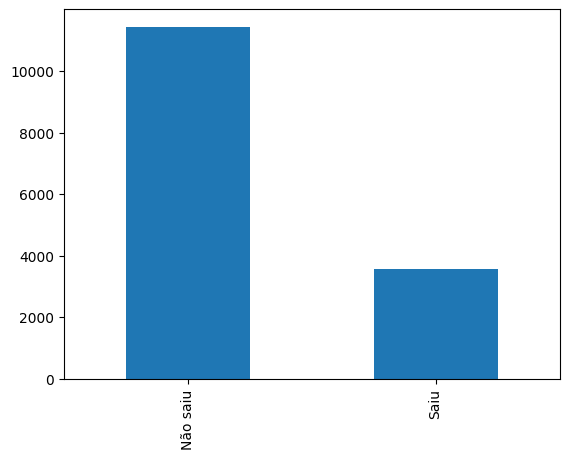

In [9]:
#grafico em barras Funcionarios que não sairam X sairam
base.saiu.value_counts().plot(kind="bar")
plt.xticks((0,1), ["Não saiu", "Saiu"])

In [10]:
#por departamento
valores = pd.crosstab(base.departamento, base.saiu)

In [11]:
valores

saiu,0,1
departamento,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [12]:
#por departamento, em porcentagem
soma = valores.sum(axis=1)
round(valores.divide(soma, axis=0)*100, 2)

saiu,0,1
departamento,,
IT,77.75,22.25
RandD,84.63,15.37
accounting,73.40,26.60
hr,70.91,29.09
management,85.56,14.44
marketing,76.34,23.66
product_mng,78.05,21.95
sales,75.51,24.49
support,75.10,24.90


In [13]:
pd.crosstab(base.salario, base.saiu)

saiu,0,1
salario,,
high,1155,82
low,5144,2172
medium,5129,1317


In [14]:
valores_salario = pd.crosstab(base.salario, base.saiu)
soma_salarios = valores_salario.sum(axis=1)
round(valores_salario.divide(soma_salarios, axis=0)*100, 2)

saiu,0,1
salario,,
high,93.37,6.63
low,70.31,29.69
medium,79.57,20.43


In [15]:
porc_salario = round(valores_salario.divide(soma_salarios, axis=0)*100, 2)

<Axes: xlabel='salario'>

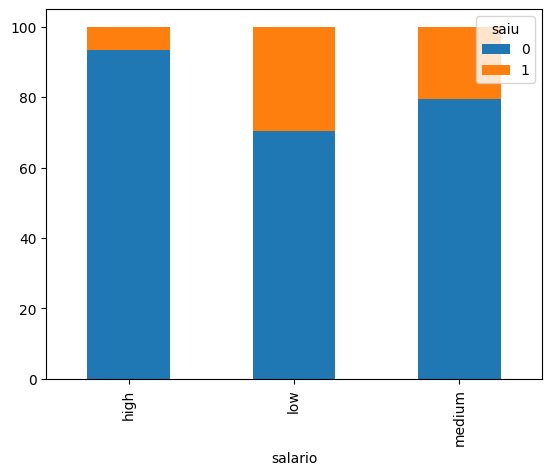

In [16]:
porc_salario.plot(kind="bar", stacked=True)

ETAPA DE PROCESSAMENTO DE DADOS

In [60]:
#PRÉ-PROCESSAMENTO

In [17]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nivel_satisfacao    14978 non-null  float64
 1   ult_avaliacao       14999 non-null  float64
 2   num_projetos        14999 non-null  int64  
 3   media_horas_mes     14999 non-null  int64  
 4   tempo_empresa       14999 non-null  int64  
 5   aci_trabalho        14999 non-null  int64  
 6   saiu                14999 non-null  int64  
 7   promocao_ult_5anos  14999 non-null  int64  
 8   departamento        14999 non-null  object 
 9   salario             14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [18]:
#Verificando valores nulos
base.isnull().sum()

nivel_satisfacao      21
ult_avaliacao          0
num_projetos           0
media_horas_mes        0
tempo_empresa          0
aci_trabalho           0
saiu                   0
promocao_ult_5anos     0
departamento           0
salario                0
dtype: int64

In [19]:
base.nivel_satisfacao.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
14994    False
14995    False
14996    False
14997    False
14998    False
Name: nivel_satisfacao, Length: 14999, dtype: bool

In [20]:
#substituindo valores nulos pela média
base.loc[base.nivel_satisfacao.isnull(), 'nivel_satisfacao'] = base.nivel_satisfacao.mean()

In [21]:
#verificando valores nulos novamente
base.isnull().sum()

nivel_satisfacao      0
ult_avaliacao         0
num_projetos          0
media_horas_mes       0
tempo_empresa         0
aci_trabalho          0
saiu                  0
promocao_ult_5anos    0
departamento          0
salario               0
dtype: int64

In [1]:
#Preparação dos dados variáveis categóricas e normalização

In [22]:
base = pd.get_dummies(base, drop_first= True)

In [29]:
pd.DataFrame([base.max(), base.min()], index=["max", "min"]).T

,max,min
nivel_satisfacao,1.0,0.09
ult_avaliacao,1.0,0.36
num_projetos,7.0,2.00
media_horas_mes,310.0,96.00
tempo_empresa,10.0,2.00
aci_trabalho,1.0,0.00
saiu,1.0,0.00
promocao_ult_5anos,1.0,0.00
departamento_RandD,1.0,0.00
departamento_accounting,1.0,0.00


In [63]:
from sklearn import preprocessing

In [64]:
x = base.values
x

array([[0.38, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 0.  , 1.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 1.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 1.  , 0.  ]])

In [65]:
minmax = preprocessing.MinMaxScaler()

In [66]:
x_scaled = minmax.fit_transform(x)

In [67]:
x_scaled

array([[0.31868132, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.78021978, 0.78125   , 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.02197802, 0.8125    , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.30769231, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.02197802, 0.9375    , 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.30769231, 0.25      , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [68]:
base = pd.DataFrame(x_scaled, columns=base.columns)

In [69]:
base.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [70]:
pd.DataFrame([base.max(), base.min()], index=["max", "min"]).T

,max,min
nivel_satisfacao,1.0,0.0
ult_avaliacao,1.0,0.0
num_projetos,1.0,0.0
media_horas_mes,1.0,0.0
tempo_empresa,1.0,0.0
aci_trabalho,1.0,0.0
saiu,1.0,0.0
promocao_ult_5anos,1.0,0.0
departamento_RandD,1.0,0.0
departamento_accounting,1.0,0.0


MODELAGEM

In [73]:
#eliminando a coluna saiu da entrada de dados
cols = list(base.columns)
cols.remove("saiu")

In [74]:
#entrada de dados
X = base[cols]

In [76]:
#Saida de dados
y = base["saiu"]

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
knn = KNeighborsClassifier(n_neighbors= 3)
tree = DecisionTreeClassifier()

In [80]:
#separação 80% treinamento e 20% validação

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11999, 18) (3000, 18) (11999,) (3000,)


In [85]:
#Acuracia

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [88]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [89]:
predicted = knn.predict(X_test)

In [90]:
accuracy_score(predicted, y_test)

0.9473333333333334

In [91]:
#95% de acertos

In [92]:
confusion_matrix(predicted, y_test)

array([[2155,   49],
       [ 109,  687]])

In [93]:
#Arvore de decisao

In [94]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [95]:
accuracy_score(tree.predict(X_test), y_test)

0.98

In [96]:
confusion_matrix(tree.predict(X_test), y_test)

array([[2224,   20],
       [  40,  716]])

VALIDAÇÃO CRUZADA

In [97]:
from sklearn.model_selection import cross_val_score

In [100]:
scores = cross_val_score(knn, X, y, cv= 5, scoring='accuracy')

In [101]:
scores

array([0.96666667, 0.931     , 0.93433333, 0.95733333, 0.95165055])

In [103]:
#acuracia media
scores.mean()

0.9481967767033457

In [104]:
#desvio padrao
scores.std()

0.013597545694866528

In [106]:
scores_tree = cross_val_score(tree, X, y, cv=5, scoring='accuracy')

In [107]:
scores_tree

array([0.98066667, 0.963     , 0.97      , 0.98966667, 0.97732578])

In [108]:
scores_tree.mean()

0.9761318217183506

In [109]:
scores_tree.std()

0.009112917762871016

In [110]:
#verificou-se que o algoritmo de arvore de decisao foi mais eficiente

In [111]:
#importancia dos atributos

In [112]:
tree.feature_importances_

array([4.99775104e-01, 1.48787547e-01, 1.04260958e-01, 8.45436617e-02,
       1.42913791e-01, 2.24940668e-03, 3.03593195e-04, 5.91587923e-04,
       9.40345557e-04, 2.58536230e-04, 7.56815056e-04, 4.47511168e-04,
       1.65896674e-04, 2.74881178e-03, 3.23040583e-03, 3.33588529e-03,
       2.41345394e-03, 2.27668813e-03])

In [114]:
pd.DataFrame(tree.feature_importances_, index = X.columns)[:5]

,0
nivel_satisfacao,0.499775
ult_avaliacao,0.148788
num_projetos,0.104261
media_horas_mes,0.084544
tempo_empresa,0.142914


<Axes: >

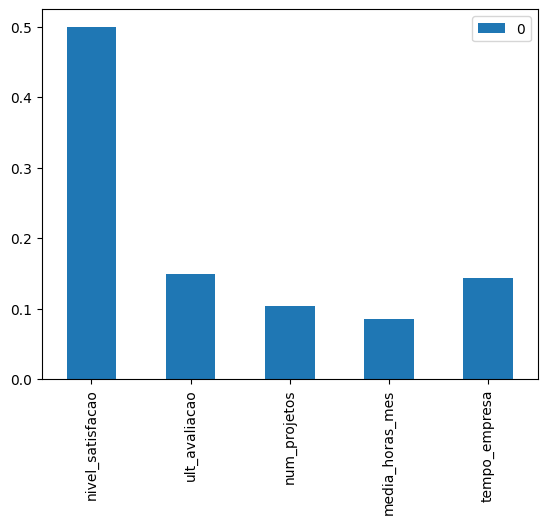

In [116]:
pd.DataFrame(tree.feature_importances_, index = X.columns)[:5].plot(kind='bar')

In [117]:
#Deploy com pickle

In [118]:
import pickle

In [119]:
tree.fit(X, y)

DecisionTreeClassifier()

In [120]:
pickle.dump(tree, open("modelo_rh.pickle", 'wb'))

In [121]:
tree_salva = pickle.load(open("modelo_rh.pickle", 'rb'))

In [122]:
tree_salva

DecisionTreeClassifier()

In [123]:
tree_salva.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])